# Comparison between the types for the ages (after controlling for gender)

Questions

- What are the differences between the types for the ages?
- Do we observe the same changes as globally?

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/gene_length.RData")
load("../results/dge/metadata.RData")
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [6]:
# Interactions between genders and ages (after controlling type)
GF_SPF_8w = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,0,0), alpha=0.05, test="Wald")
GF_SPF_52w = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,0,1), alpha=0.05, test="Wald")
GF_SPF_104w = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,1,0), alpha=0.05, test="Wald")
GF_SPF = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,1/3,1/3), alpha=0.05, test="Wald")

In [7]:
w8_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2',
    'GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2')
w52_samples = c(    
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2',
    'GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2')
w104_samples = c(      
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2',
    'GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("type","gender")])
to_comp = c("GF VS SPF (8w)", "GF VS SPF (52w)", "GF VS SPF (104w)")

# Differentially expressed genes

In [9]:
type_age_data = list(GF_SPF_8w, GF_SPF_52w, GF_SPF_104w)
names(type_age_data) = to_comp
type_age_deg = extract_diff_expr_genes(type_age_data, "type-effect/type_age/")

Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in stack.default(getgo(rownames(l$sign_fc_deg), "mm10", "geneSymbol")):
“non-vector elements will be ignored”Warning message in stack.default(getgo(rownames(as.data.frame(l$deg)), "mm10", "geneSymbol", :
“non-vector elements will be ignored”

# Stats

,All DEG (Wald padj < 0.05),All over-expressed genes (Wald padj < 0.05 & FC > 0),All under-expressed genes (Wald padj < 0.05 & FC < 0),DEG (Wald padj < 0.05 & abs(FC) > 1.5),Over-expressed genes (Wald padj < 0.05 & FC > 1.5),Under-expressed genes (Wald padj < 0.05 & FC < 1.5)
GF VS SPF (8w),337,180,157,177,92,85
GF VS SPF (52w),779,310,469,328,110,218
GF VS SPF (104w),2622,1122,1500,1283,315,968


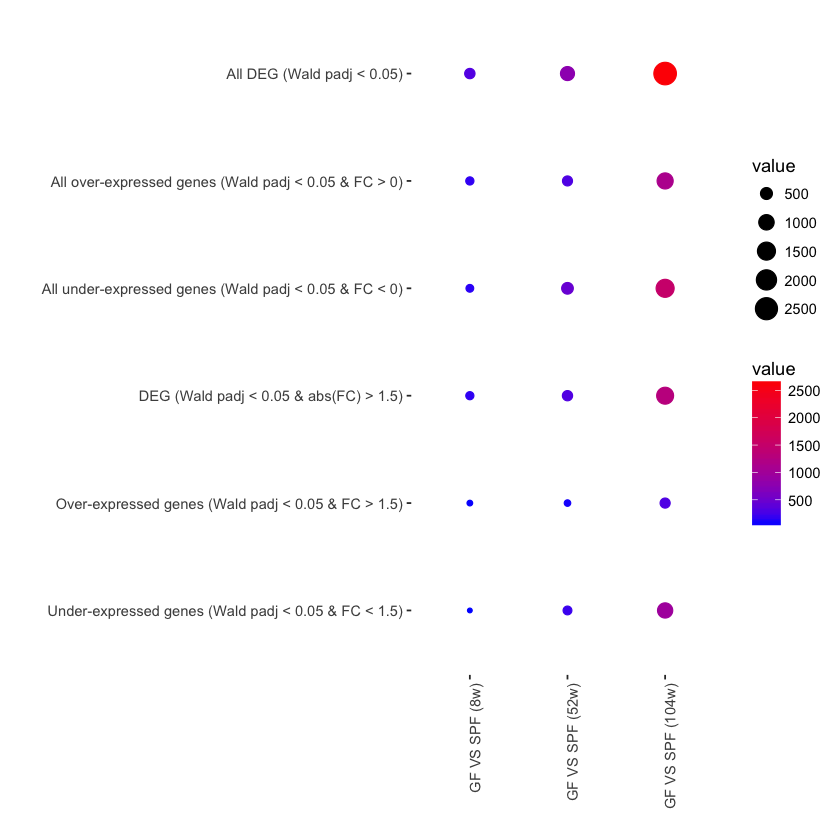

In [10]:
type_age_deg$stat
plot_stat_mat(type_age_deg$stat)

## All DEG (Wald padj < 0.05)

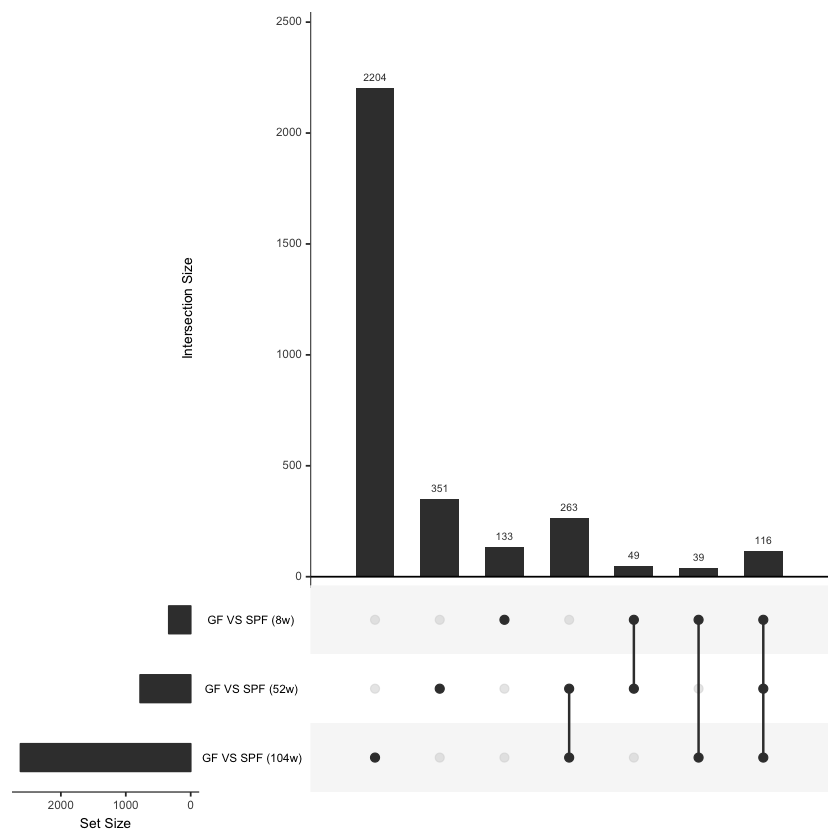

In [11]:
# Differentially expressed genes
upset(as.data.frame(type_age_deg$deg),nsets = 6)

## DEG (Wald padj < 0.05 & abs(FC) > 1.5)

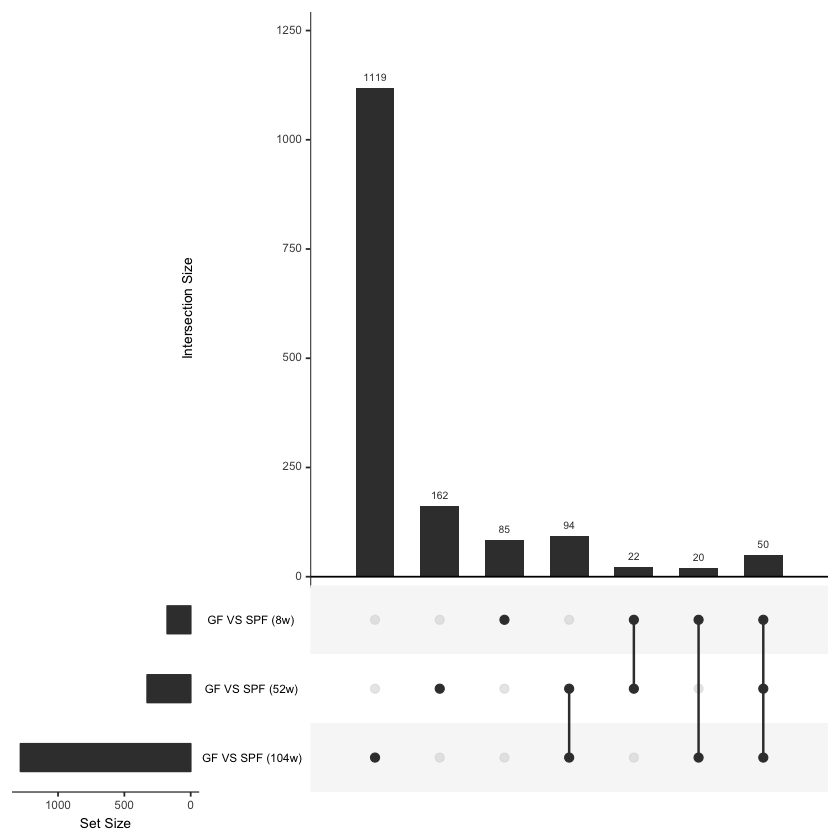

In [12]:
upset(as.data.frame(1*(!is.na(type_age_deg$sign_fc_deg))),nsets = 6)

# Log2FC for DEG (Wald padj < 0.05 & abs(FC) > 1.5)

,comp,age
GF VS SPF (8w),GF VS SPF,8w
GF VS SPF (52w),GF VS SPF,52w
GF VS SPF (104w),GF VS SPF,104w


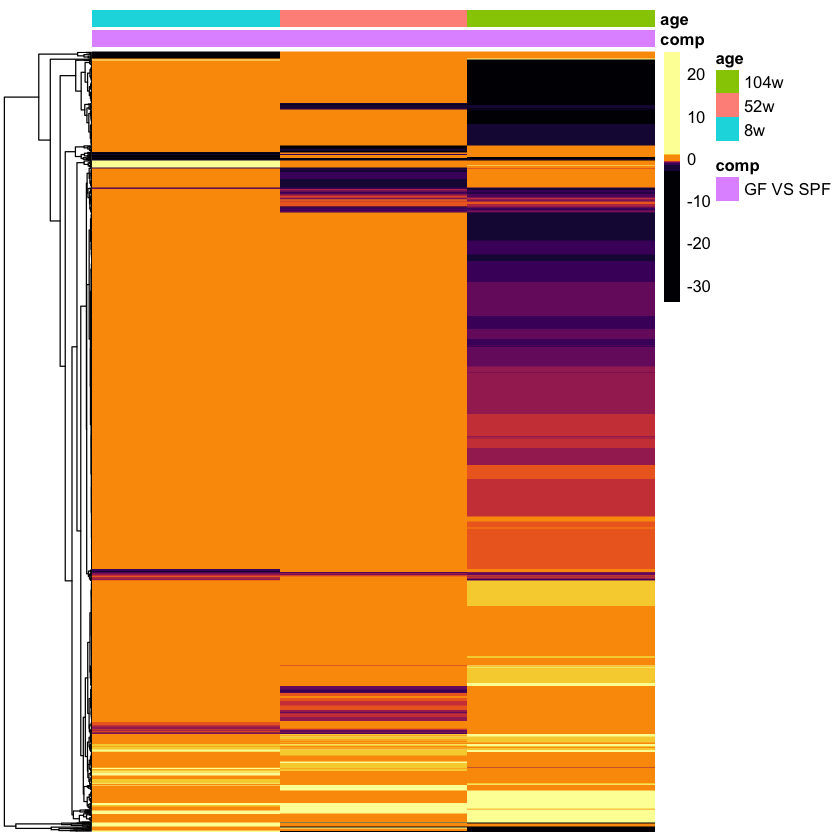

In [14]:
fc_annot = data.frame(comp = rep("GF VS SPF",3),
                      age = c("8w","52w","104w"))
rownames(fc_annot) = colnames(type_age_deg$sign_fc_deg)
fc_annot
plot_fc_heatmap(type_age_deg$sign_fc_deg, fc_annot)

# Counts

GF != SPF for 8w with abs(FC) > 2

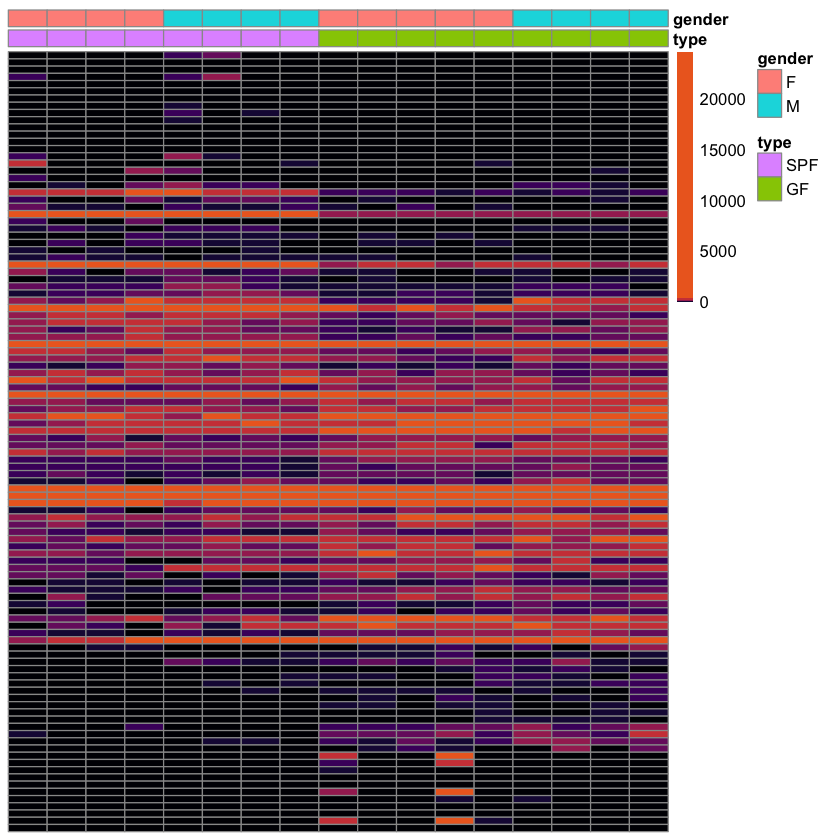

In [15]:
# GF != SPF for 8w with abs(FC) > 2
genes = names((sort(type_age_deg$fc_deg[which(abs(type_age_deg$fc_deg[,1])>1),1])))
plot_count_heatmap(genes,w8_samples, annot)

GF != SPF for 52w with abs(FC) > 2

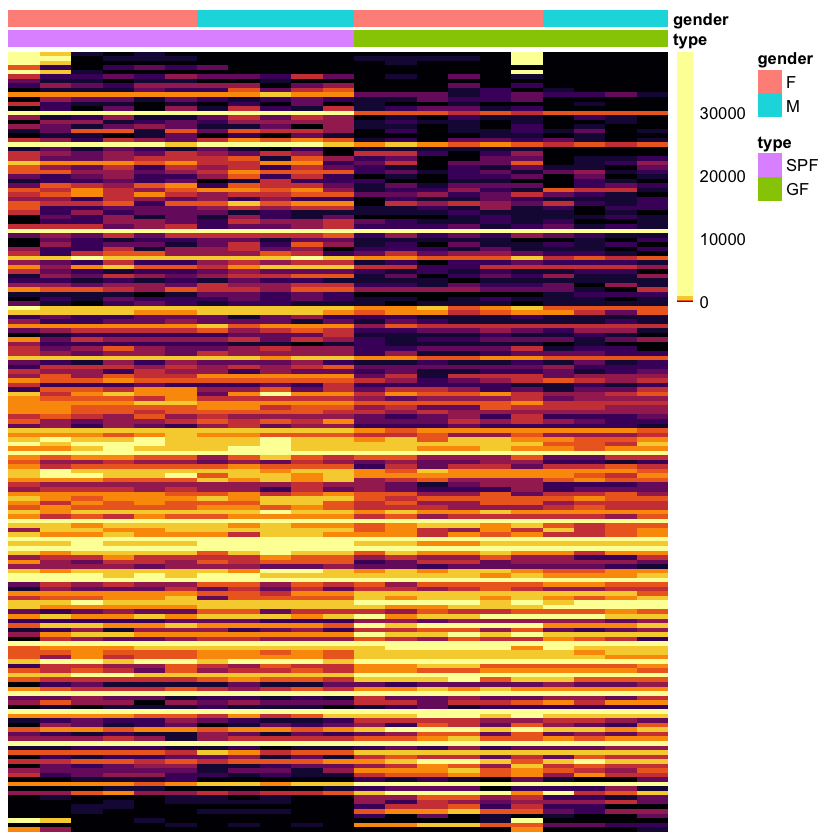

In [16]:
# GF != SPF for 52w with abs(FC) > 2
genes = names((sort(type_age_deg$fc_deg[which(abs(type_age_deg$fc_deg[,2])>1),2])))
plot_count_heatmap(genes,w52_samples, annot)

GF != SPF for 104w with abs(FC) > 2

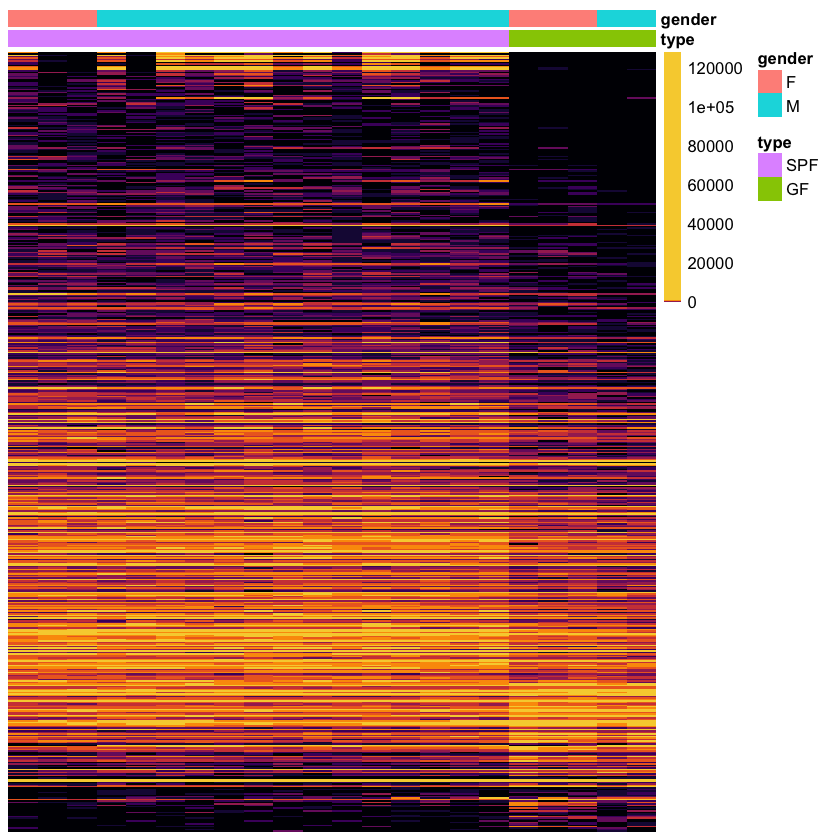

In [17]:
# GF != SPF for 104w with abs(FC) > 2
genes = names((sort(type_age_deg$fc_deg[which(abs(type_age_deg$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,w104_samples, annot)

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

GF vs SPF: 8w, 52w, 104w


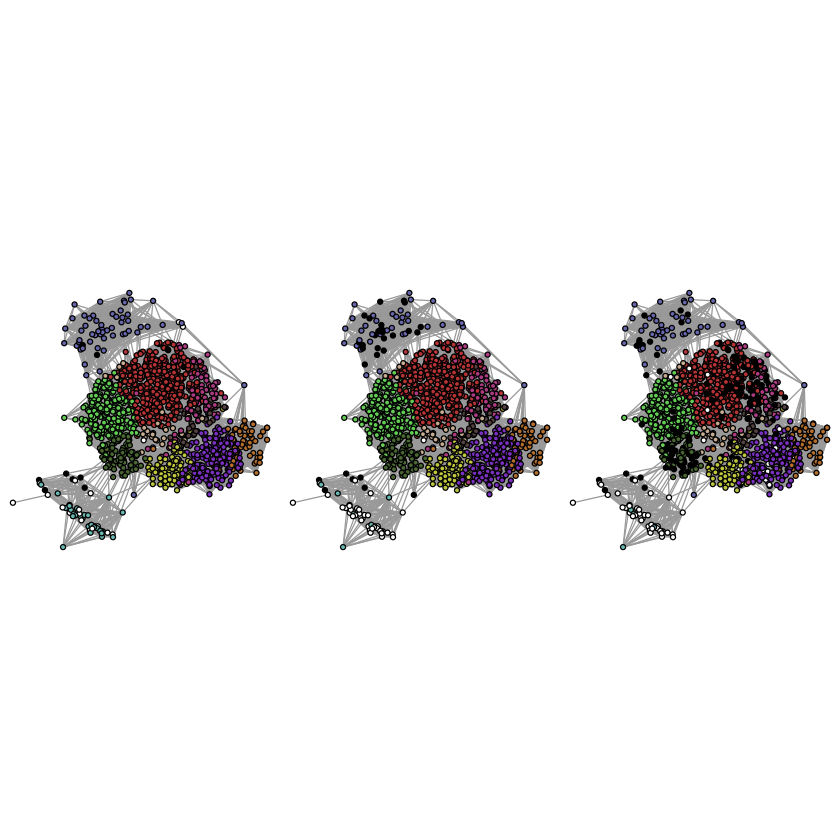

In [18]:
par(mfrow=c(1,3),mar=c(0,0,0,0))
col_GF_vs_SPF_8w = get_deg_colors(type_age_deg, to_comp[1], connected_gene_colors, module_nb)
plot_net_with_layout(net, col_GF_vs_SPF_8w, pal2, layout, add_legend = FALSE)
col_GF_vs_SPF_52w = get_deg_colors(type_age_deg, to_comp[2], connected_gene_colors, module_nb)
plot_net_with_layout(net, col_GF_vs_SPF_52w, pal2, layout, add_legend = FALSE)
col_GF_vs_SPF_104w = get_deg_colors(type_age_deg, to_comp[3], connected_gene_colors, module_nb)
plot_net_with_layout(net, col_GF_vs_SPF_104w, pal2, layout, add_legend = FALSE)

# GO analysis

In [19]:
full_go_desc = type_age_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = type_age_deg$GO_wall[[1]][,"category"]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


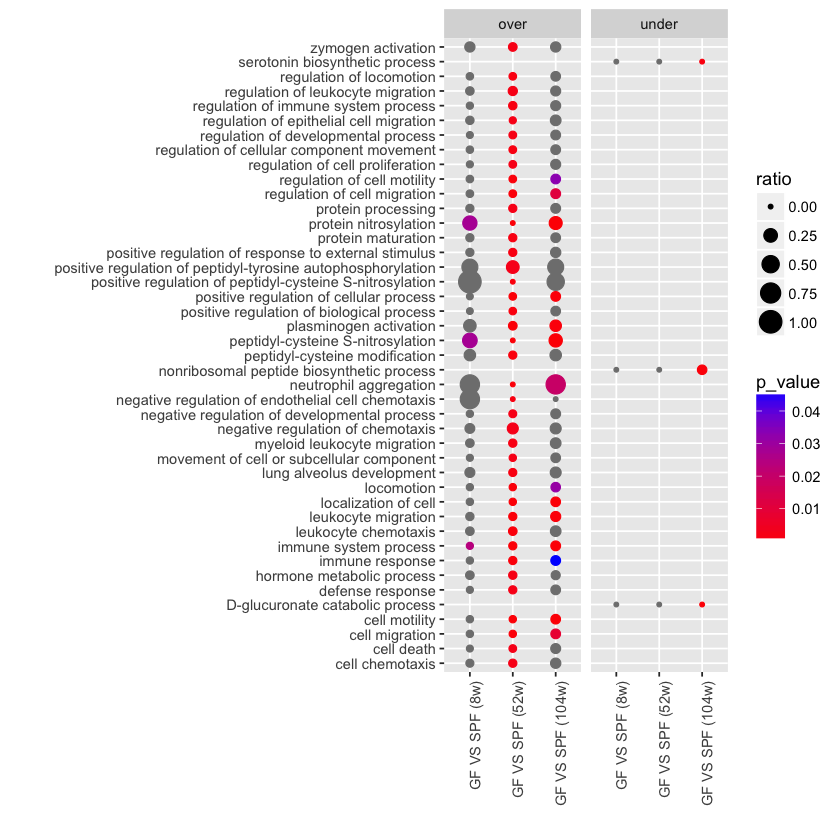

In [20]:
plot_top_go(type_age_deg$over_represented_GO,
            type_age_deg$under_represented_GO,
            type_age_deg$GO_wall,
            "BP",
            40)

Network based on description similarity

In [21]:
BP_network = create_GO_network(type_age_deg, "BP", BP_GO)

GF vs SPF: 8w, 52w, 104w

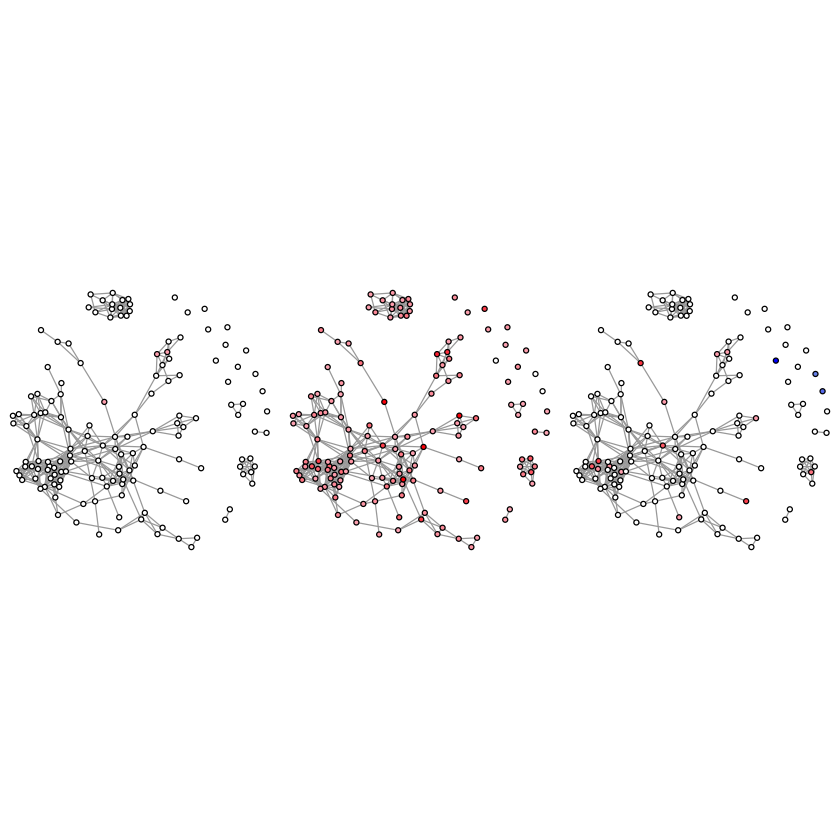

In [22]:
par(mfrow=c(1,3),mar=c(0,0,0,0))
plot_GO_networks(BP_network, to_comp[1], full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, to_comp[2], full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, to_comp[3], full_go_desc, plot_interactive = FALSE)

### GF VS SPF (8w)

In [23]:
col = get_GO_network_col(BP_network, "GF VS SPF (8w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_age/go/GF_VS_SPF_8w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_age/go/GF_VS_SPF_8w.png)

GO Tree at "../results/dge/type-effect/type_age/go/GF_VS_SPF_8w.png"

### GF VS SPF (52w)

In [24]:
col = get_GO_network_col(BP_network, "GF VS SPF (52w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_age/go/GF_VS_SPF_52w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_age/go/GF_VS_SPF_52w.png)

GO Tree at "../results/dge/type-effect/type_age/go/GF_VS_SPF_52w.png"

### GF VS SPF (104w)

In [25]:
col = get_GO_network_col(BP_network, "GF VS SPF (104w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_age/go/GF_VS_SPF_104w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_age/go/GF_VS_SPF_104w.png)

GO Tree at "../results/dge/type-effect/type_age/go/GF_VS_SPF_104w.png"

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

Using term, id as id variables


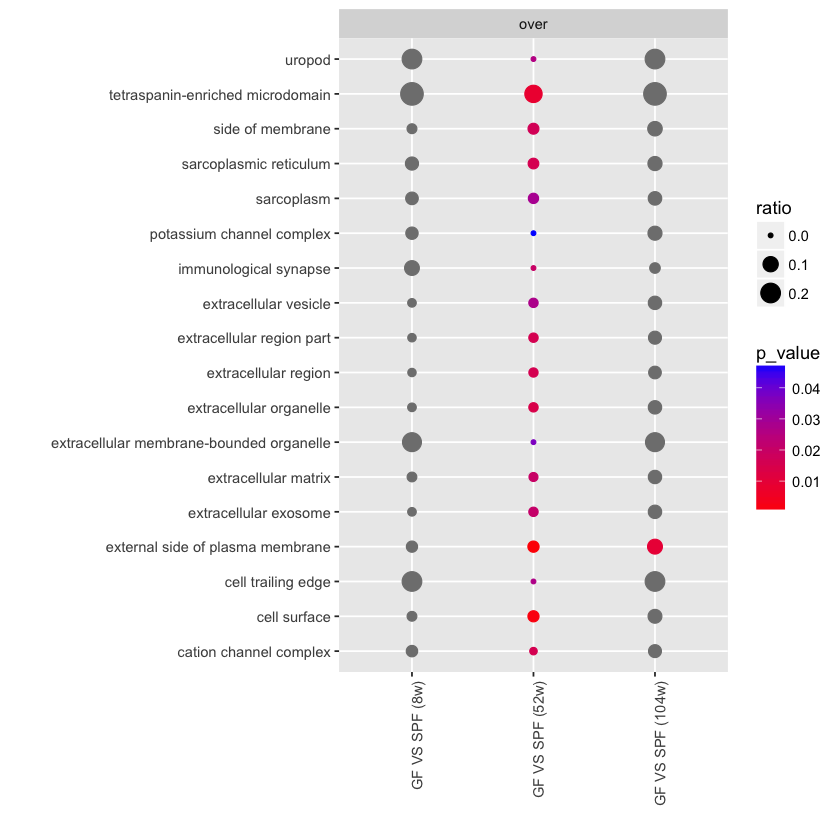

In [26]:
plot_top_go(type_age_deg$over_represented_GO,
            type_age_deg$under_represented_GO,
            type_age_deg$GO_wall,
            "CC",
            40)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


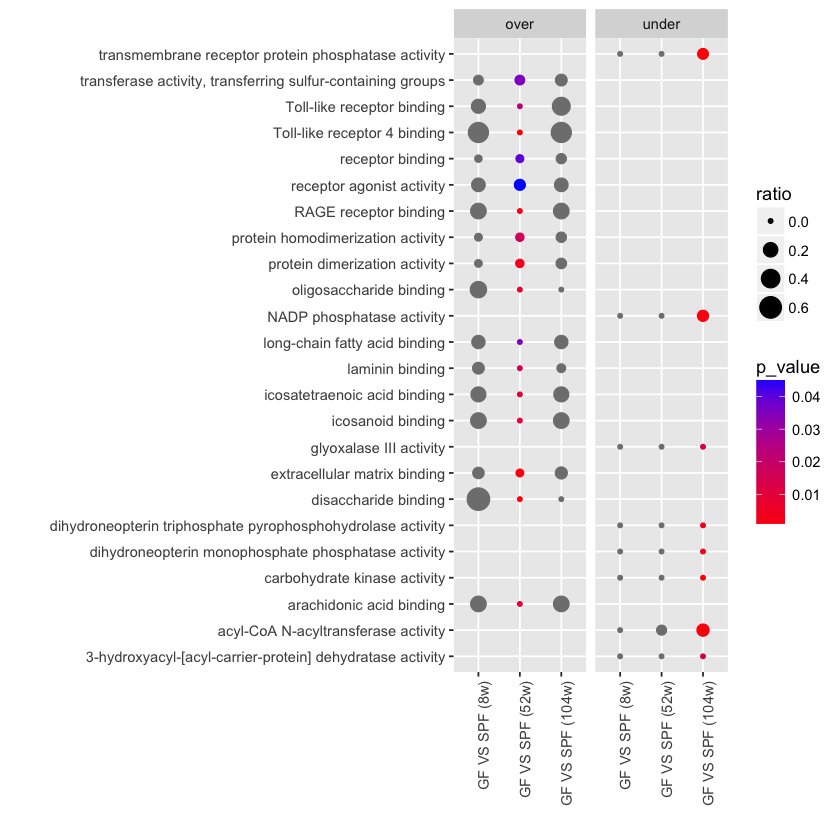

In [27]:
plot_top_go(type_age_deg$over_represented_GO,
            type_age_deg$under_represented_GO,
            type_age_deg$GO_wall,
            "MF",
            40)

# KEGG pathways

In [28]:
plot_kegg_pathways(type_age_deg$over_represented_KEGG[,"category"],
                   type_age_deg$fc_deg,
                   "../results/dge/type-effect/type_age/kegg/over_repr_kegg/")

ERROR: Error in `$<-.data.frame`(`*tmp*`, labels, value = c("", "", "", "", "", : replacement has 54 rows, data has 58


Pathway graphs available at ../results/dge/type-effect/type_age/over_repr_kegg/

In [ ]:
plot_kegg_pathways(type_age_deg$under_represented_KEGG[,"category"],
                   type_age_deg$fc_deg,
                   "../results/dge/type-effect/type_age/kegg/under_repr_kegg/")

Pathway graphs available at ../results/dge/type-effect/type_age/under_repr_kegg/